<a href="https://colab.research.google.com/github/gagan3754/Yulu---Hypothesis-Testing/blob/main/Business_Case_Yulu_Hypothesis_Testing_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/bike_sharing.csv')

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.shape

(10886, 12)

In [ ]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
df.dtypes

,0
datetime,object
season,int64
holiday,int64
workingday,int64
weather,int64
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df['datetime']=pd.to_datetime(df['datetime'])

In [ ]:
cat_cols=['season','holiday','workingday','weather']

In [ ]:
for i in cat_cols:
  df[i]=df[i].astype('object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [ ]:
df.describe(include=['int','float'])

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
df.describe(include=['int','float','object'])

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,NaN,NaN,NaN,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,NaN,NaN,NaN,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


In [ ]:
df.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [ ]:
for i in cat_cols:
  print(df[i].unique())
  print('-'*50)

[1 2 3 4]
--------------------------------------------------
[0 1]
--------------------------------------------------
[0 1]
--------------------------------------------------
[1 2 3 4]
--------------------------------------------------


In [ ]:
for i in cat_cols:
  print(df[i].value_counts())
  print('-'*50)

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64
--------------------------------------------------
holiday
0    10575
1      311
Name: count, dtype: int64
--------------------------------------------------
workingday
1    7412
0    3474
Name: count, dtype: int64
--------------------------------------------------
weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64
--------------------------------------------------


In [ ]:
df['datetime'].max()

Timestamp('2012-12-19 23:00:00')

In [ ]:
df['datetime'].min()

Timestamp('2011-01-01 00:00:00')

#Univariate Analysis

countplots of all the categorical variables

In [ ]:
cat_cols

['season', 'holiday', 'workingday', 'weather']

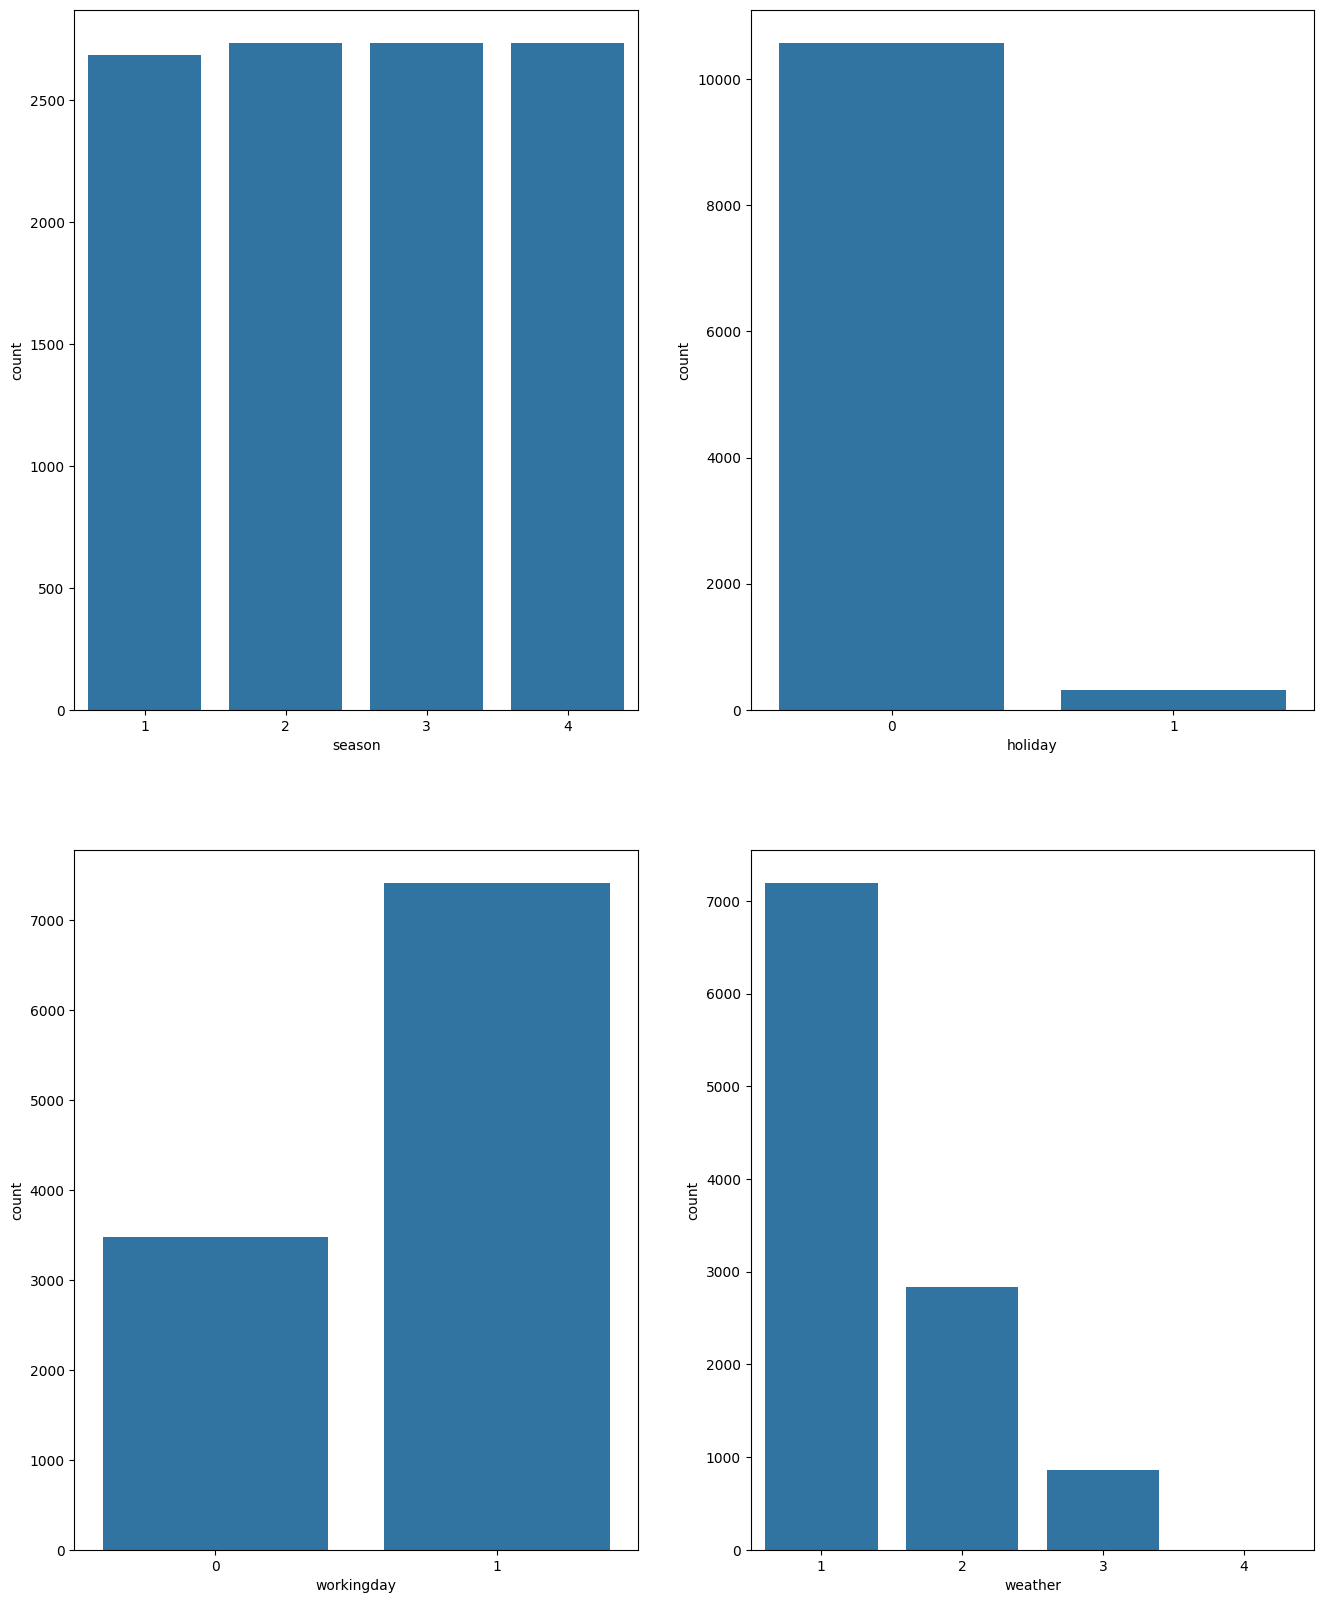

In [ ]:
figure,axis=plt.subplots(nrows=2,ncols=2,figsize=(16,20))
index=0
for row in range(2):
  for col in range(2):
    sns.countplot(data=df,x=cat_cols[index],ax=axis[row,col])
    index+=1

In [ ]:
num=df.select_dtypes(['int','float']).columns

In [ ]:
num

Index(['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered',
       'count'],
      dtype='object')

In [ ]:
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']

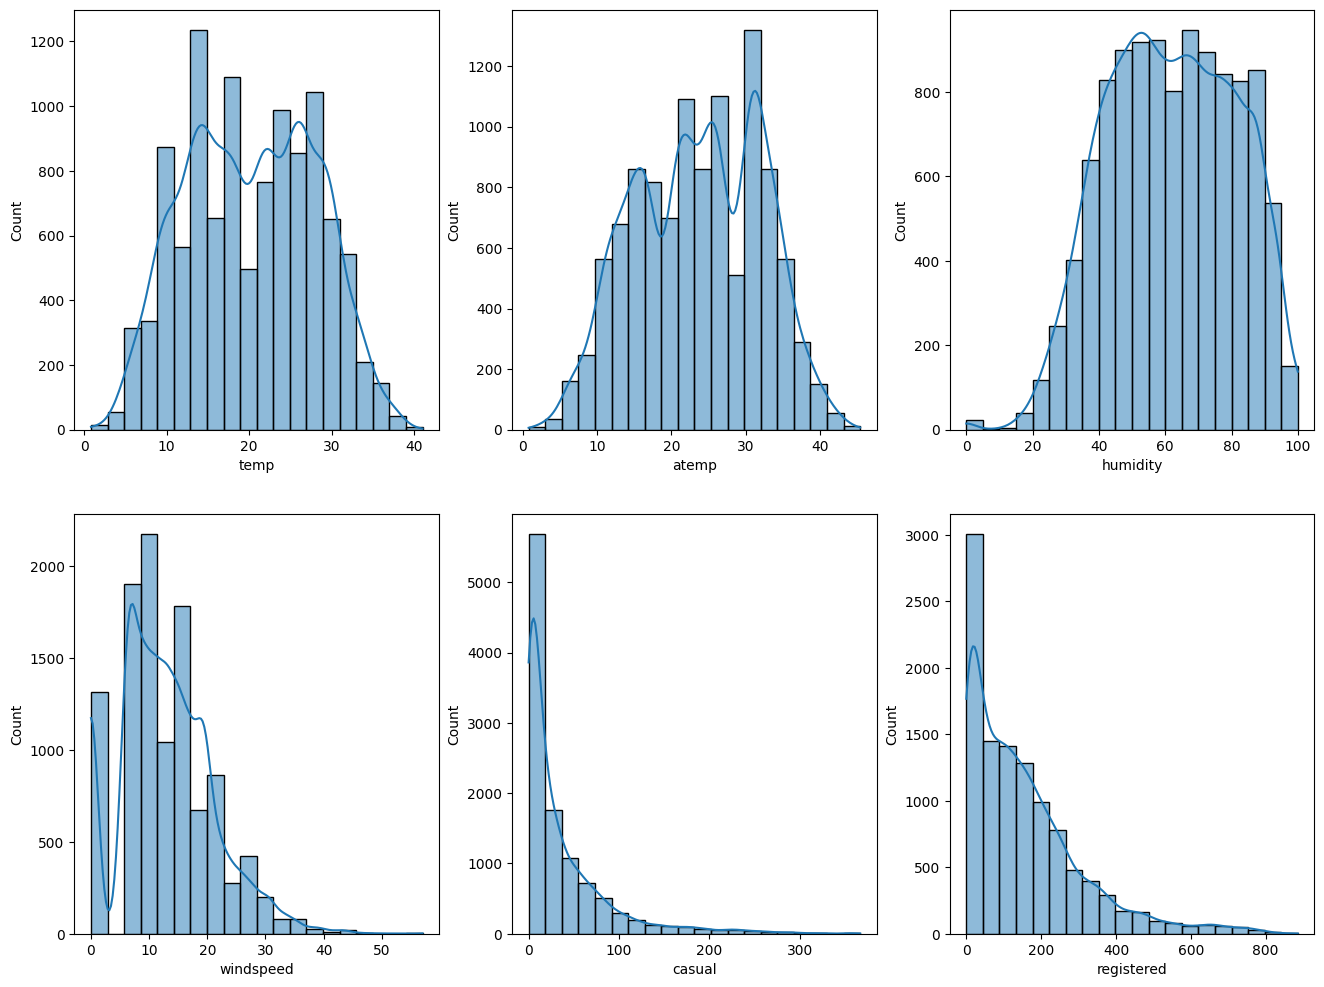

In [ ]:
figure,axis=plt.subplots(nrows=2,ncols=3,figsize=(16,12))
index=0
for row in range(2):
  for col in range(3):
    sns.histplot(data=df,x=num_cols[index],kde=True,ax=axis[row,col],bins=20)
    index+=1

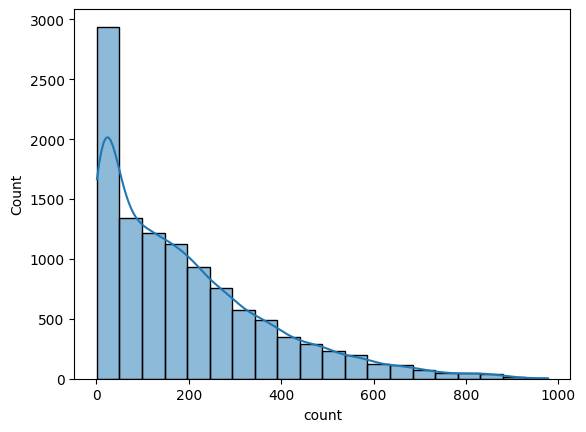

In [ ]:
sns.histplot(data=df,x=num_cols[-1],kde=True,bins=20)
plt.show()

#Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count.

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
val=['workingday','season','weather']

In [ ]:
#barplot

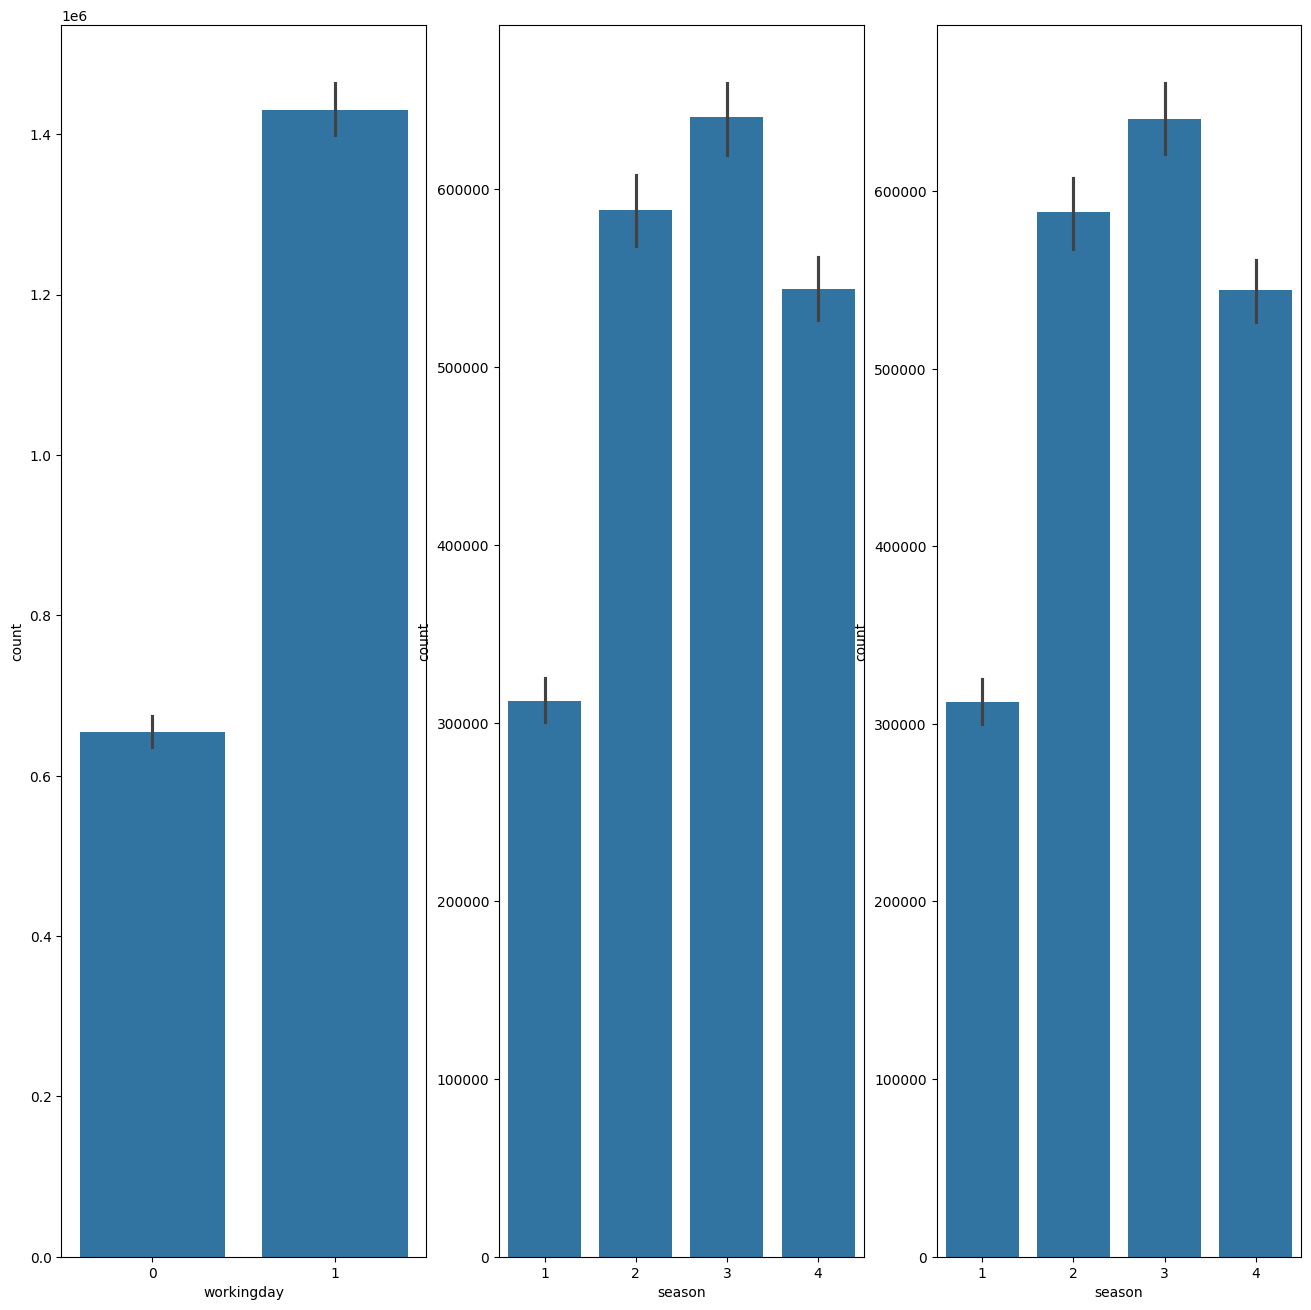

In [ ]:
fig,axis=plt.subplots(nrows=1,ncols=3,figsize=(16,16))
index=0
for col in range(3):
  sns.barplot(data=df,x=val[index],y='count',ax=axis[col],estimator=np.sum)
  index=+1

In [ ]:
#Boxplot

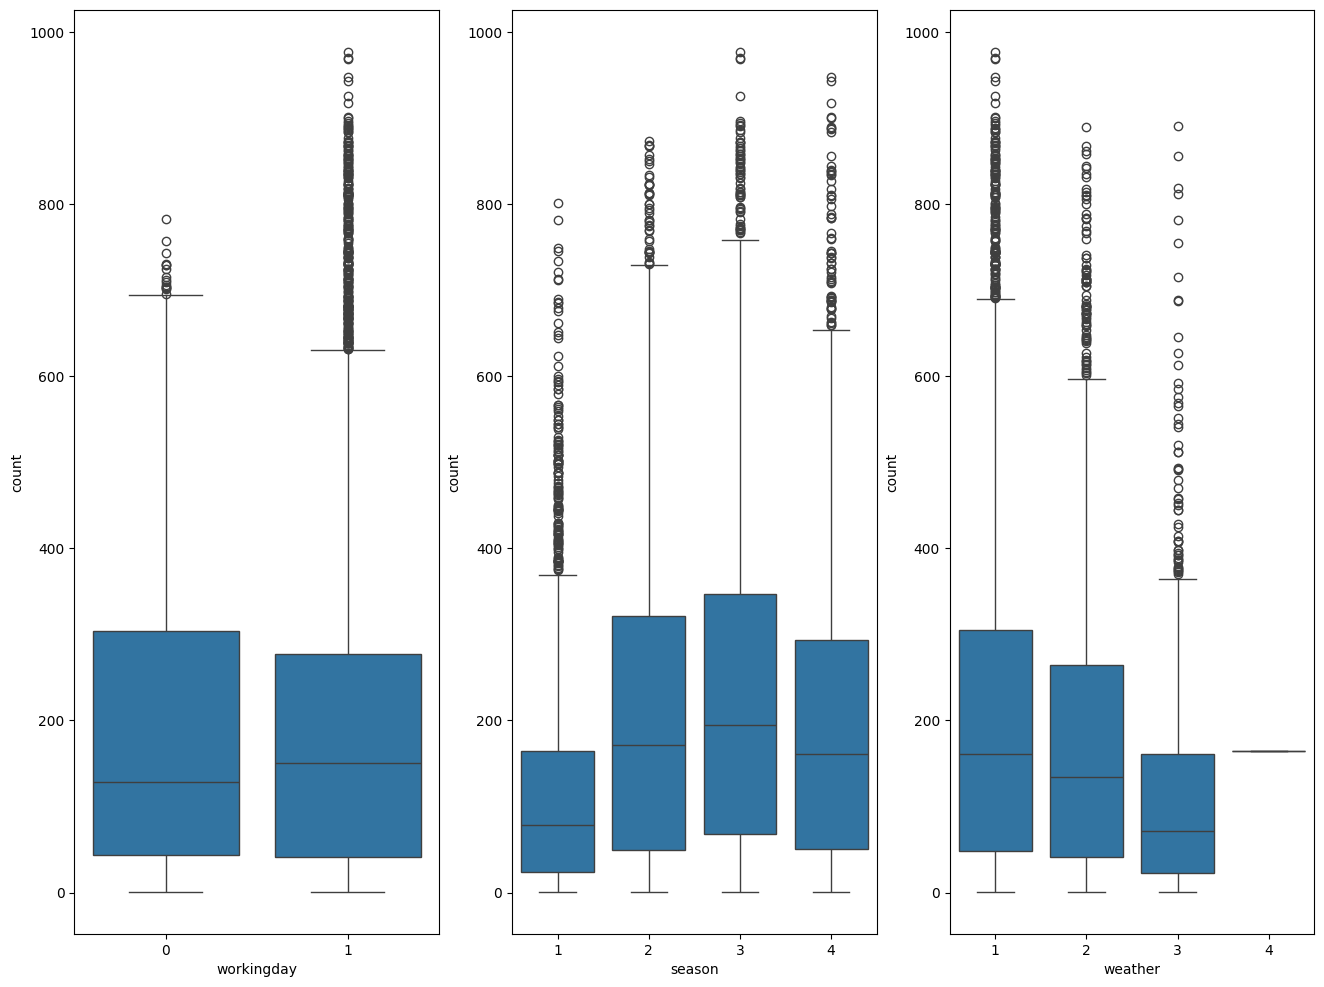

In [ ]:
fig,axis=plt.subplots(nrows=1,ncols=3,figsize=(16,12))
index=0
for col in range(3):
  sns.boxplot(data=df,x=val[index],y='count',ax=axis[col])
  index+=1

In [ ]:
#scatterplot

In [ ]:
num_cols=['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']

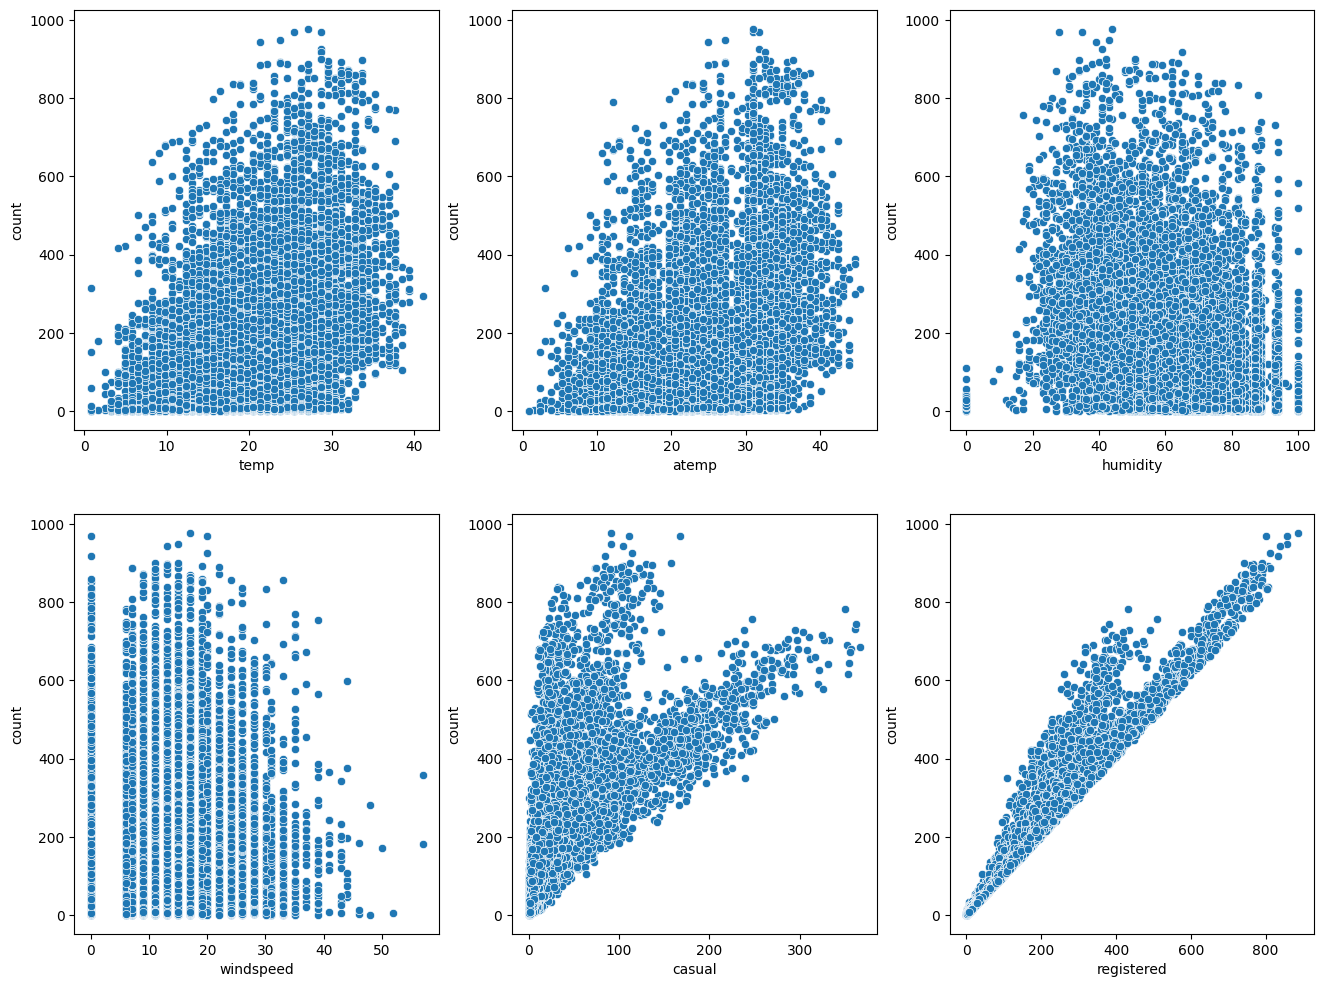

In [ ]:
fig,axis=plt.subplots(nrows=2,ncols=3,figsize=(16,12))
index=0
for row in range(2):
  for col in range(3):
    sns.scatterplot(data=df,x=num_cols[index],y='count',ax=axis[row,col])
    index+=1

Correlation and heatmap

In [ ]:
imp=df.select_dtypes(['int','float']).corr()
imp

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


<Axes: >

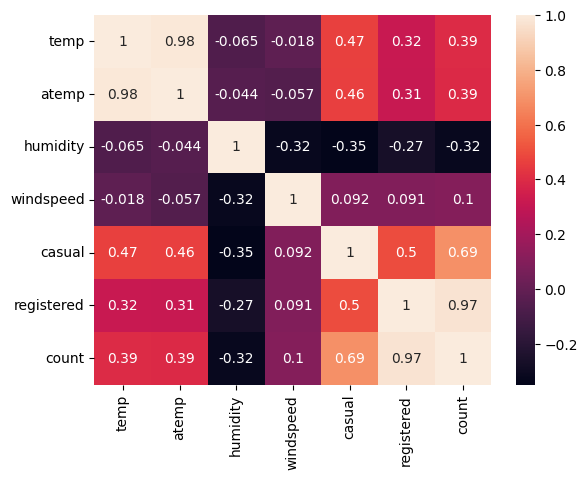

In [ ]:
sns.heatmap(imp,annot=True)

Find if outliers exist using boxplot

In [ ]:
df.select_dtypes(['int','float']).columns

Index(['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered',
       'count'],
      dtype='object')

In [ ]:
num=['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']

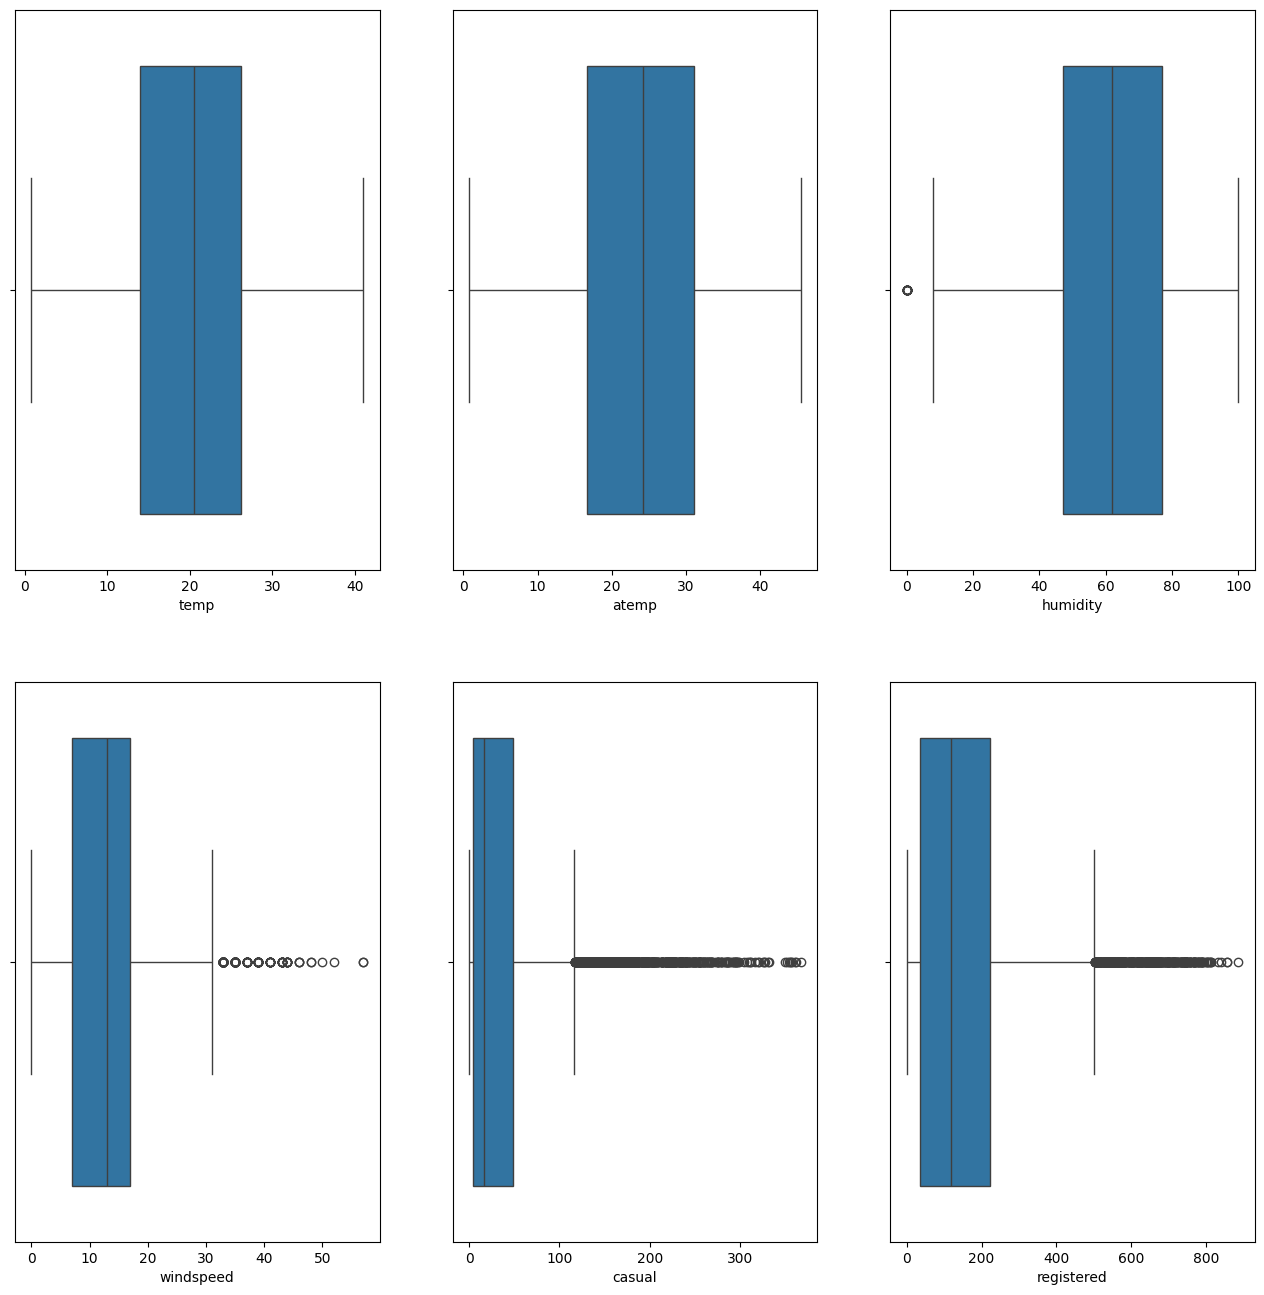

<Axes: xlabel='count'>

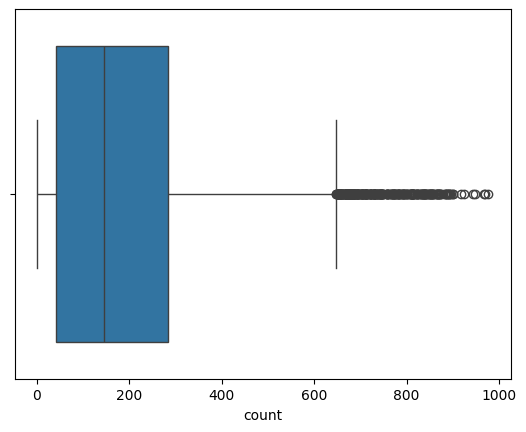

In [ ]:
figure,axis=plt.subplots(nrows=2,ncols=3,figsize=(16,16))
index=0
for row in range(2):
  for col in range(3):
    sns.boxplot(data=df,x=num[index],ax=axis[row,col])
    index+=1
plt.show()
sns.boxplot(data=df,x=num[-1])

In [ ]:
for i in num:
  Q1=np.quantile(df[i],0.25)
  Q3=np.quantile(df[i],0.75)
  IQR=Q3-Q1
  outliers=((df[i]<Q1-1.5*IQR)|(df[i]>Q3+1.5*IQR))
  print(i,": ",outliers.sum())
  print()

temp :  0

atemp :  0

humidity :  22

windspeed :  227

casual :  749

registered :  423

count :  300



#Hypothesis testing 2 sample test

2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df['workingday'].value_counts()

,count
workingday,
1,7412
0,3474


Significance level (alpha): 0.05

Null Hypothesis : Working Day has no effect on the number of electric cycles rented


Alternative Hypothesis : Working Day has effect on the number of electric cycles rented

In [ ]:
workday=df[df['workingday']==1]['count'].values
nonworkday=df[df['workingday']==0]['count'].values

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
t,p=ttest_ind(workday,nonworkday)

In [ ]:
print('Test_Statistics',t)
print('p_value',p)

Test_Statistics 1.2096277376026694
p_value 0.22644804226361348


In [ ]:
alpha=0.05

In [ ]:
if p>alpha:
  print('Null Hypothesis')
  print('Working Day has no effect on the number of electric cycles rented')
else:
  print('Alternate Hypothesis')
  print('Working Day has effect on the number of electric cycles rented')

Null Hypothesis
Working Day has no effect on the number of electric cycles rented


ANNOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season

In [ ]:
#significance value
alpha=0.05

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


 Null Hypothesis : No. of cycles rented is similar weather


 Alternate Hypothesis : No. of cycles rented is different weather

In [ ]:
df['weather'].value_counts()

,count
weather,
1,7192
2,2834
3,859
4,1


In [ ]:
g1=df[df['weather']==1]['count']
g2=df[df['weather']==2]['count']
g3=df[df['weather']==3]['count']
g4=df[df['weather']==4]['count']


Lets see the assumption for anova test

1 . Check Normality

In [ ]:
from statsmodels.graphics.gofplots import qqplot

In [ ]:
import statsmodels.api as sm

In [ ]:
val=[g1,g2,g3,g4]

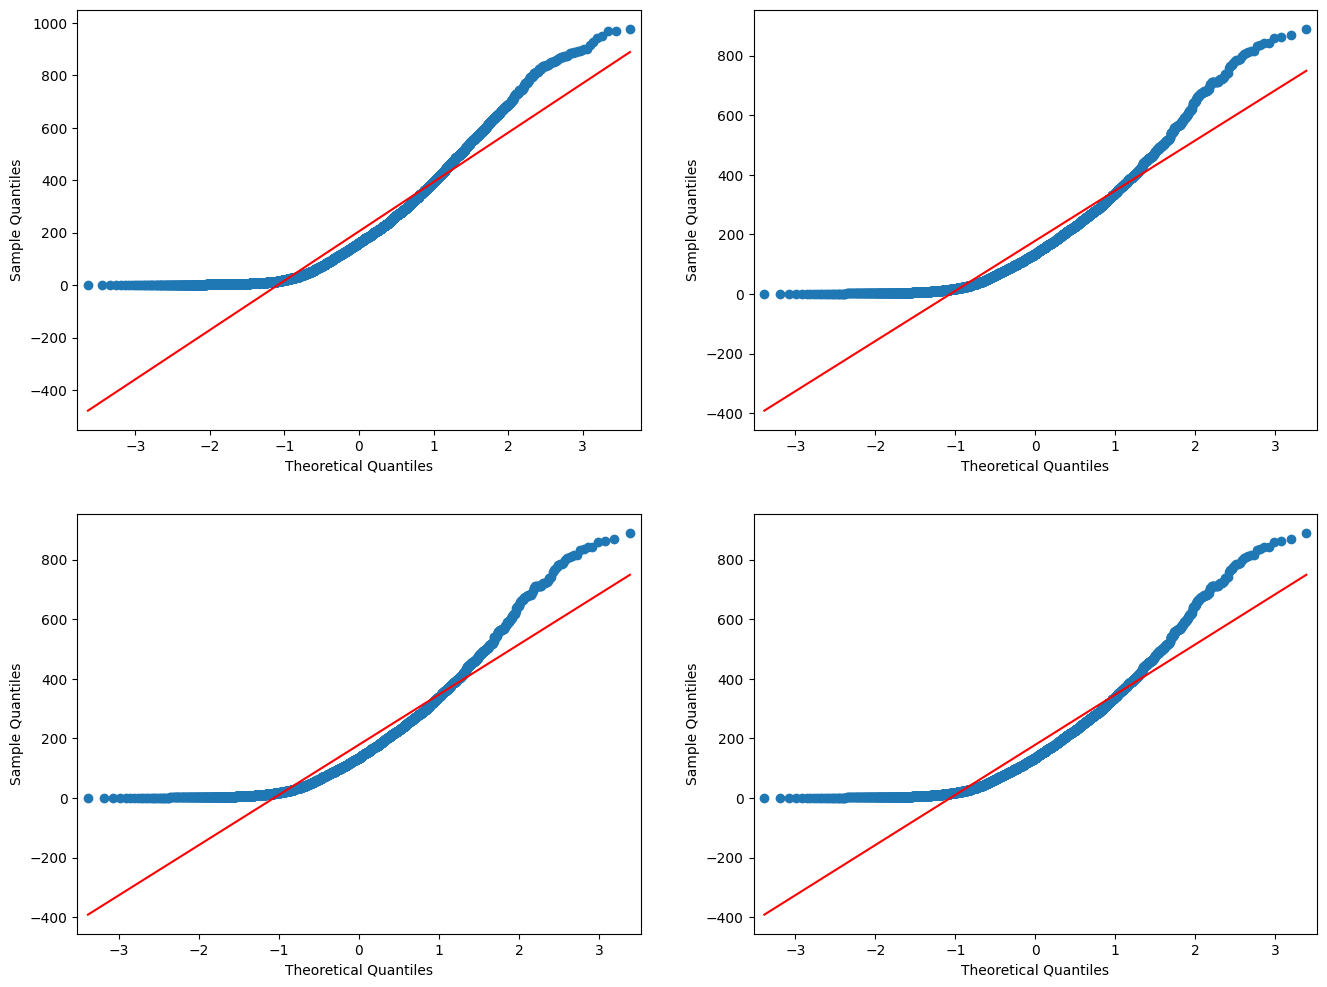

In [ ]:
fig,axis=plt.subplots(nrows=2,ncols=2,figsize=(16,12))
index=0
for row in range(2):
  for col in range(2):
    qqplot(val[index],line='s',ax=axis[row,col])
    index=+1

Data is not in nromal distribution

Let's check whether equal variance using levene test

In [ ]:
from scipy.stats import levene

In [ ]:
t,p=levene(g1,g2,g3,g4)

In [ ]:
p

3.504937946833238e-35

In [ ]:
if p>alpha:
  print('Equal variance')
else:
  print('Not equal variance')

Not equal variance


So all the assumptions of anova has failed , still we do anova and then kruskal walis

In [ ]:
from scipy.stats import f_oneway

In [ ]:
t_stat,p=f_oneway(g1,g2,g3,g4)
print("Test statistics",t_stat)
print("P_Value",p)

Test statistics 65.53024112793271
P_Value 5.482069475935669e-42


In [ ]:
from scipy.stats import kruskal

In [ ]:
t_stat,p=kruskal(g1,g2,g3,g4)
print("Test_statistics",t_stat)
print("P_value",p)

Test_statistics 205.00216514479087
P_value 3.501611300708679e-44


In [ ]:
if p>alpha:
  print('Null Hypothesis')
  print('No. of cycles rented is similar weather')
else:
  print('Alternate Hypothesis')
  print('No. of cycles rented is different weather')

Alternate Hypothesis
No. of cycles rented is different weather


Anova for weather

Null Hypothesis : No. of cycles rented is similar in all season

Alternate Hypothesis :  No. of cycles rented is different in all season

In [ ]:
df['season'].value_counts()

,count
season,
4,2734
2,2733
3,2733
1,2686


In [ ]:
s1=df[df['season']==1]['count']
s2=df[df['season']==2]['count']
s3=df[df['season']==3]['count']
s4=df[df['season']==4]['count']

Check for normality using qqplots

In [ ]:
from statsmodels.graphics.gofplots import qqplot

In [ ]:
val=[s1,s2,s3,s4]

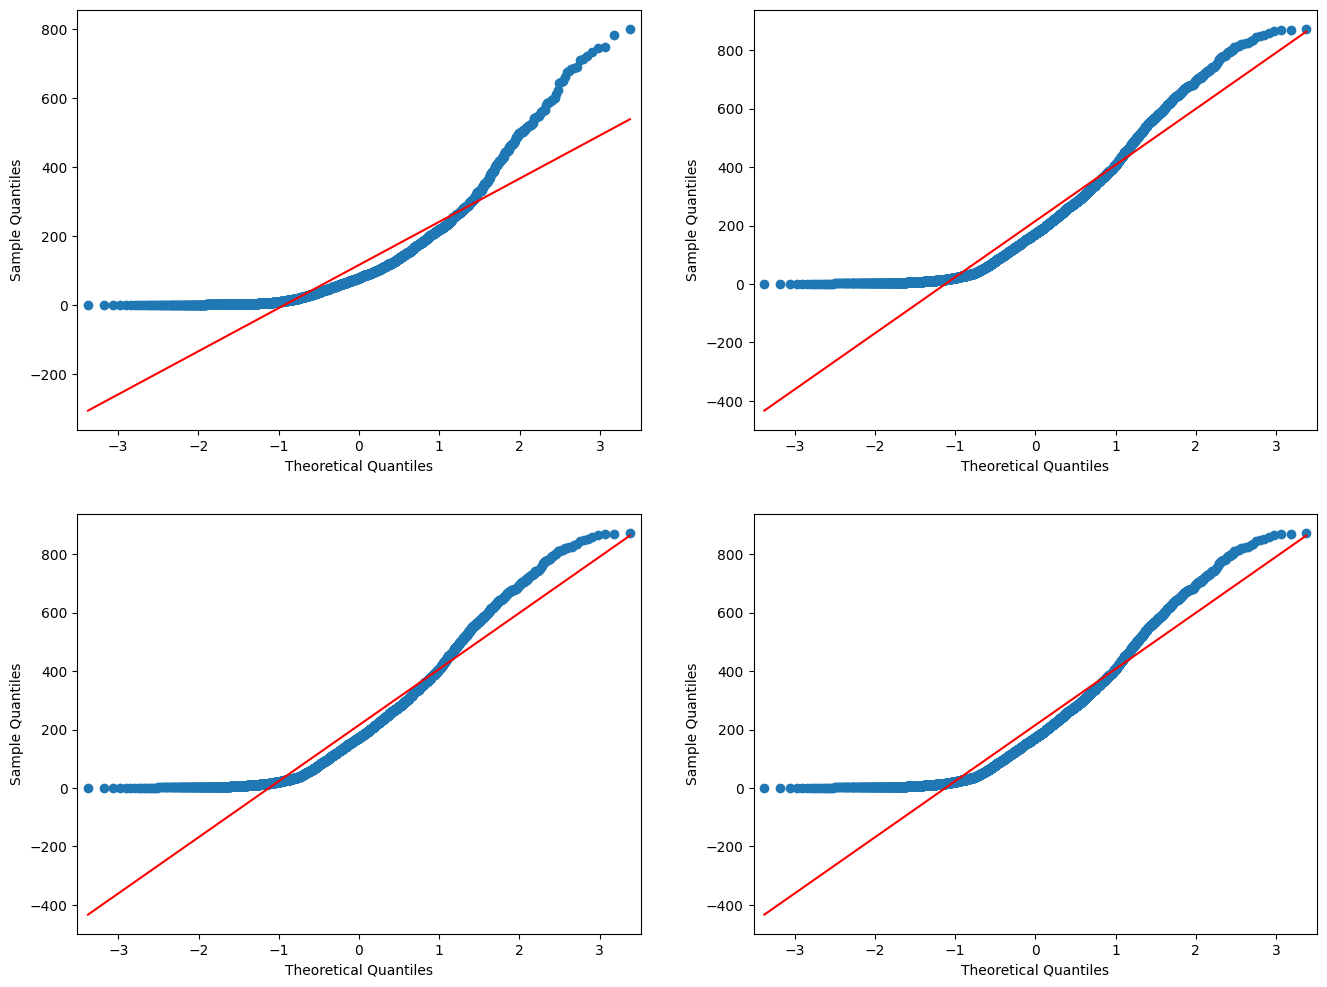

In [ ]:
fig,axis=plt.subplots(nrows=2,ncols=2,figsize=(16,12))
index=0
for row in range(2):
  for col in range(2):
    qqplot(val[index],line='s',ax=axis[row,col])
    index=+1

Data is not normally distributed

Check for equal variance using levene test

In [ ]:
from scipy.stats import levene

In [ ]:
test_stat,p=levene(s1,s2,s3,s4)
print(test_stat,p)

187.7706624026276 1.0147116860043298e-118


In [ ]:
if p>alpha:
  print('equal variance')
else:
  print('Not equal variance')

Not equal variance


All the assumptions of anova are not met

In [ ]:
from scipy.stats import f_oneway

In [ ]:
f_oneway(s1,s2,s3,s4)

F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149)

In [ ]:
from scipy.stats import kruskal

In [ ]:
t_stat,p=kruskal(s1,s2,s3,s4)
print("Test Statistics",t_stat)
print("p_value",p)

Test Statistics 699.6668548181988
p_value 2.479008372608633e-151


In [ ]:
if p>alpha:
  print("Null Hypothesis")
  print("No. of cycles rented is similar in all season")
else:
  print("Alternate Hypothesis")
  print("No. of cycles rented is different in all season")

Alternate Hypothesis
No. of cycles rented is different in all season


#Chi-square test to check if Weather is dependent on the season

In [ ]:
alpha=0.05

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
i=pd.crosstab(df['weather'],df['season'])
i

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
t_stat,p,df,expect_freq=chi2_contingency(i)

In [ ]:
print("Test_Statistics",t_stat)
print("p_value",p)
print("dof",df)
print("Expected Frequency",expect_freq)

Test_Statistics 49.15865559689363
p_value 1.5499250736864862e-07
dof 9
Expected Frequency [[1.77454639e+03 1.80559765e+03 1.80559765e+03 1.80625831e+03]
 [6.99258130e+02 7.11493845e+02 7.11493845e+02 7.11754180e+02]
 [2.11948742e+02 2.15657450e+02 2.15657450e+02 2.15736359e+02]
 [2.46738931e-01 2.51056403e-01 2.51056403e-01 2.51148264e-01]]


In [ ]:
if p>alpha:
  print('Null Hypothesis')
  print('Weather is independent on the season')
else:
  print('Alternate Hypothesis')
  print('Weather is dependent on the season')

Alternate Hypothesis
Weather is dependent on the season
